# Sales Analysis

### Import Library yang digunakan

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [2]:
sales_january = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_January_2019.csv")
sales_february = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_February_2019.csv")
sales_march = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_March_2019.csv")
sales_april = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_April_2019.csv")
sales_may = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_May_2019.csv")
sales_june = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_June_2019.csv")
sales_july = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_July_2019.csv")
sales_august = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_August_2019.csv")
sales_september = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_September_2019.csv")
sales_october = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_October_2019.csv")
sales_november = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_November_2019.csv")
sales_december = pd.read_csv("https://raw.githubusercontent.com/Veleno132/DataScience/main/Sales%20Analysis/Sales_Data/Sales_December_2019.csv")

all_data = pd.concat([sales_january, sales_february, sales_march, sales_april, sales_may, sales_june,
                             sales_july, sales_august, sales_september, sales_october, sales_november, sales_december], ignore_index=True)

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Membersihkan data!

### Drop baris NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.head())

all_data = all_data.dropna(how='all')

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664       NaN     NaN              NaN        NaN        NaN              NaN
678       NaN     NaN              NaN        NaN        NaN              NaN
797       NaN     NaN              NaN        NaN        NaN              NaN
876       NaN     NaN              NaN        NaN        NaN              NaN
1299      NaN     NaN              NaN        NaN        NaN              NaN


### Menemukan 'Or' dan Menghapusnya

In [5]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Konversi Kolom ke Tipe yang Benar

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augmentasi Data dengan Kolom Tambahan

### Task 2: Menambahkan Kolom Bulan

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Task 3: Menambahkan Kolom Sales

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


### Task 4: Menambahkan Kolom Kota

In [10]:
# Menggunakan .apply()
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


**Question 1: Bulan terbaik untuk penjualan ? Berapa penghasilan yang didapatkan dibulan itu ?**

In [11]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


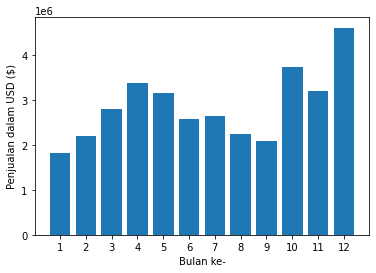

In [12]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel("Bulan ke-")
plt.ylabel("Penjualan dalam USD ($)")
plt.show()

**Question 2: Kota manakah yang memiliki penjualan tertinggi ?**

In [13]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


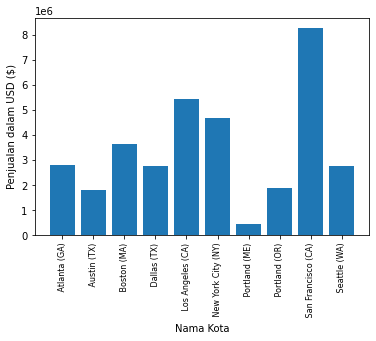

In [14]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("Nama Kota")
plt.ylabel("Penjualan dalam USD ($)")
plt.show()

**Question 3: Kapan kita seharusnya menampilkan iklan untuk menarik pelanggan untuk membeli produk ?**

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


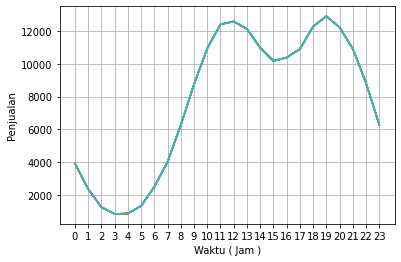

In [17]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel("Waktu ( Jam )")
plt.ylabel("Penjualan")
plt.grid()
plt.show()

Dari data diatas rekomendasi untuk menampilkan iklan pada jam 11.00 atau jam 19.00

Jam 11.00 merupakan waktu istirahat di perusahaan dan jam 19.00 adalah waktu selesai bekerja

**Question 4: Produk apa yang paling sering terjual bersamaan ?**

In [25]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [34]:
count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question 5: Produk apa yang paling laris ? Kenapa itu paling laris ?**

In [35]:
 all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


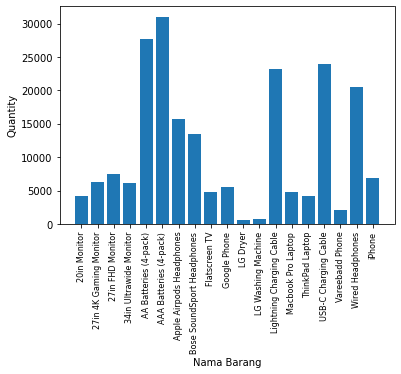

In [44]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Nama Barang')
plt.ylabel('Quantity')
plt.show()

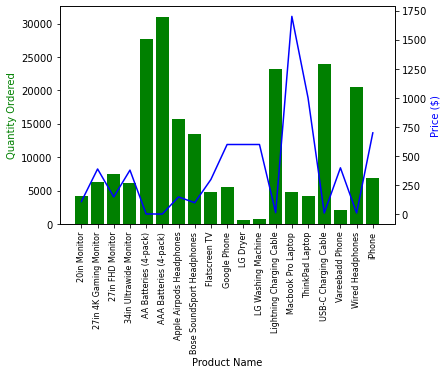

In [54]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

Baterai AA dan AAA terjual paling laris karena murah
LG dryer dan LG washing machine terjual paling sedikit karena lumayan mahal